# Predicting Wine Quality

## Importing Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import plotly.express as px

## Reading Data

In [5]:
df = pd.read_csv('winequality_data.csv')

## Understanding Data

In [6]:
df.shape

(1599, 12)

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Missing Values

In [11]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Exploring Variables

### Histogram of 'quality' variable

In [13]:
fig = px.histogram(df, x = 'quality')
fig.show()

### Correlation Matrix

(12.0, 0.0)

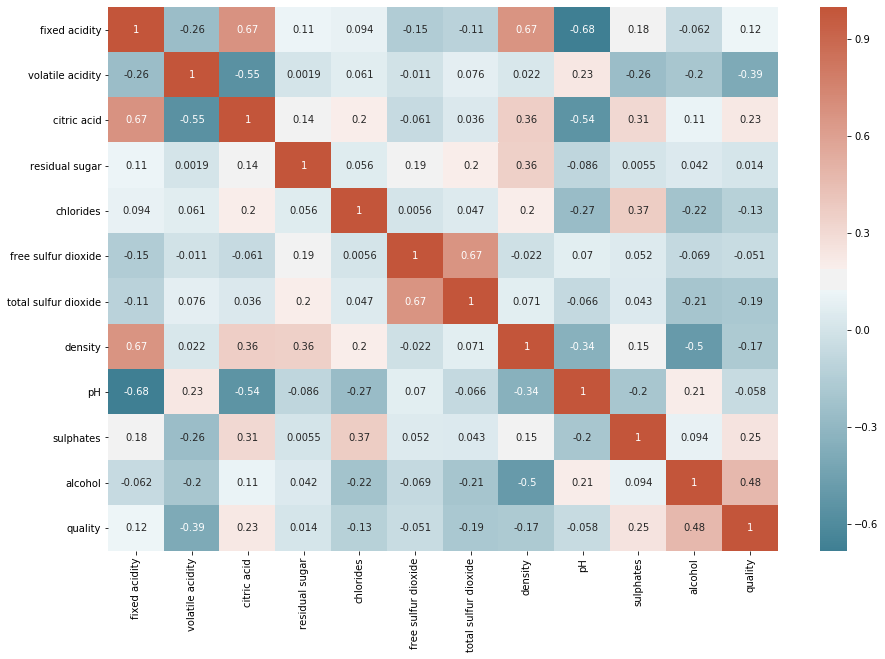

In [19]:
corr = df.corr()

# figure size
plt.pyplot.subplots(figsize=(15,10))

ax = sns.heatmap(corr, annot = True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

# matplotlib version issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Convert to a Classification Problem

In [20]:
# Create Classification version of target variable

df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]

In [23]:
# Separate feature variables and target variable

X = df.drop(['quality','goodquality'], axis = 'columns')
y = df['goodquality']

In [24]:
# See proportion of good vs bad wines

df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

## Preparing Data for Modelling

### Standardizing Feature Variables

Standardizing the data means that it will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1. It’s important to standardize your data in order to equalize the range of the data.

For example, imagine a dataset with two input features: height in millimeters and weight in pounds. Because the values of ‘height’ are much higher due to its measurement, a greater emphasis will automatically be placed on height than weight, creating a bias.

In [25]:
# Normalize feature variables

from sklearn.preprocessing import StandardScaler

X_features = X
X = StandardScaler().fit_transform(X)

In [33]:
X

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

### Split data

In [34]:
# Splitting the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0)

## Modelling

### Model 1: Decision Tree

In [39]:
# Decision Tree

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(random_state = 1)
model1.fit(X_train, y_train)
y_predict1 = model1.predict(X_test)

# model1.score(X_test, y_test)

print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       355
           1       0.53      0.73      0.62        45

    accuracy                           0.90       400
   macro avg       0.75      0.83      0.78       400
weighted avg       0.92      0.90      0.90       400



### Model 2: Random Forest

Random forests are an ensemble learning technique that builds off of decision trees. Random forests involve creating multiple decision trees using bootstrapped datasets of the original data and randomly selecting a subset of variables at each step of the decision tree. The model then selects the mode of all of the predictions of each decision tree. What’s the point of this? By relying on a “majority wins” model, it reduces the risk of error from an individual tree.

In [42]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)


# model2.score(X_test, y_test)

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       355
           1       0.67      0.53      0.59        45

    accuracy                           0.92       400
   macro avg       0.80      0.75      0.77       400
weighted avg       0.91      0.92      0.91       400



C:\Users\vashwan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



## Feature Importance

### via Random Forest

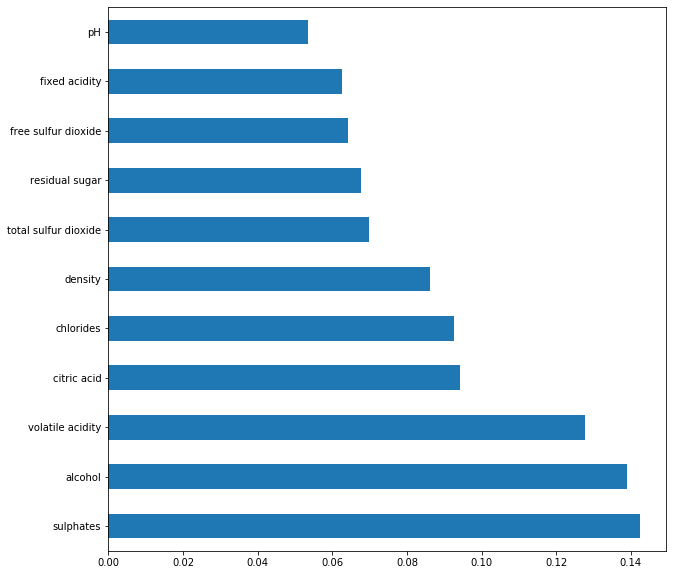

In [46]:
feat_importances = pd.Series(model2.feature_importances_,
                            index = X_features.columns)

feat_importances.nlargest(25).plot(kind = 'barh', figsize = (10,10))